# Spaceship Titanic

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## File and Data Field Descriptions
- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
  - PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
  - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
  - CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
  - Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
  - Age - The age of the passenger.
  - VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
  - Name - The first and last names of the passenger.
  - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
- test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
- sample_submission.csv - A submission file in the correct format.
  - PassengerId - Id for each passenger in the test set.
  - Transported - The target. For each passenger, predict either True or False.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/spaceship-titanic.zip
data/spaceship-titanic/test.csv
data/spaceship-titanic/train.csv
data/spaceship-titanic/sample_submission.csv


In [23]:
dataTrain = pd.read_csv('data/spaceship-titanic/train.csv')
dataTest = pd.read_csv('data/spaceship-titanic/test.csv')
dataTrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


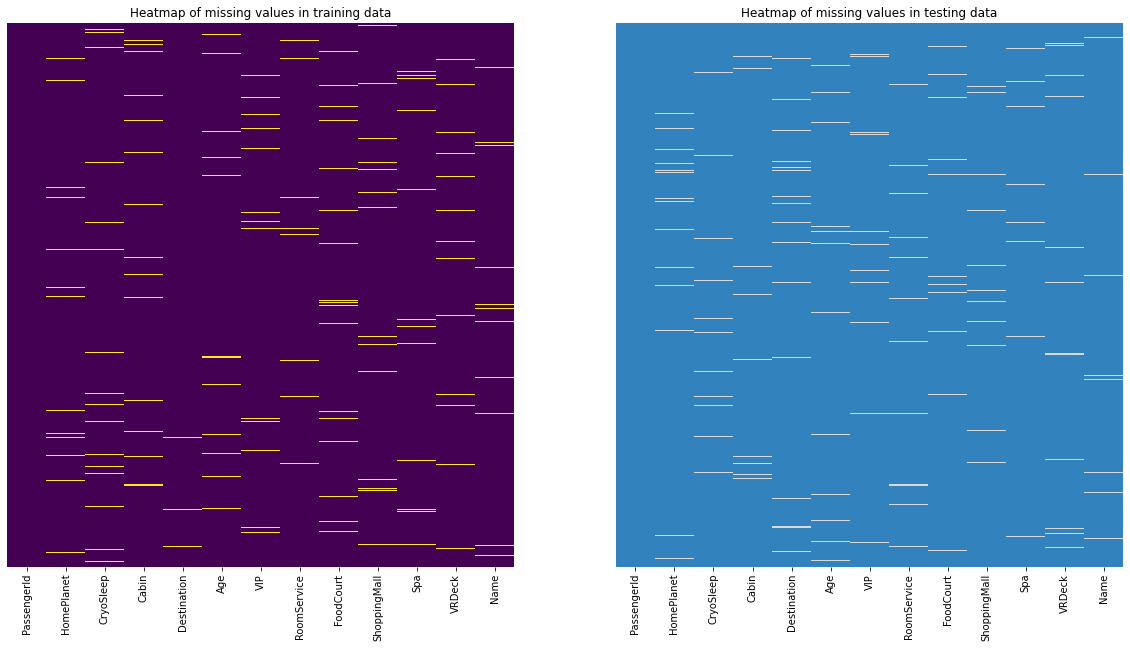

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
sns.heatmap(ax=axes[0], yticklabels=False, data=dataTrain.isnull(), cbar=False, cmap="viridis")
sns.heatmap(ax=axes[1], yticklabels=False, data=dataTest.isnull(), cbar=False, cmap="tab20c")
axes[0].set_title('Heatmap of missing values in training data')
axes[1].set_title('Heatmap of missing values in testing data')
plt.show()

In [5]:
print('Unique HomePlanet:', dataTrain.HomePlanet.unique(), '\nUnique Destination:', dataTrain.Destination.unique())

Unique HomePlanet: ['Europa' 'Earth' 'Mars' nan] 
Unique Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


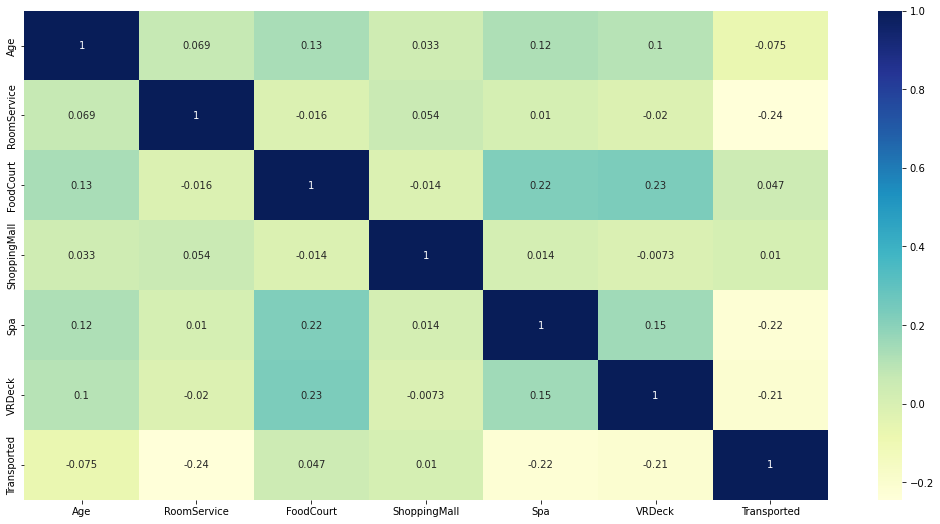

In [11]:
plt.figure(figsize=(18, 9))
sns.heatmap(dataTrain.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [14]:
tPlanet = pd.crosstab(dataTrain['Transported'], dataTrain['HomePlanet'])
tDest = pd.crosstab(dataTrain['Transported'], dataTrain['Destination'])
print(tPlanet)

HomePlanet   Earth  Europa  Mars
Transported                     
False         2651     727   839
True          1951    1404   920


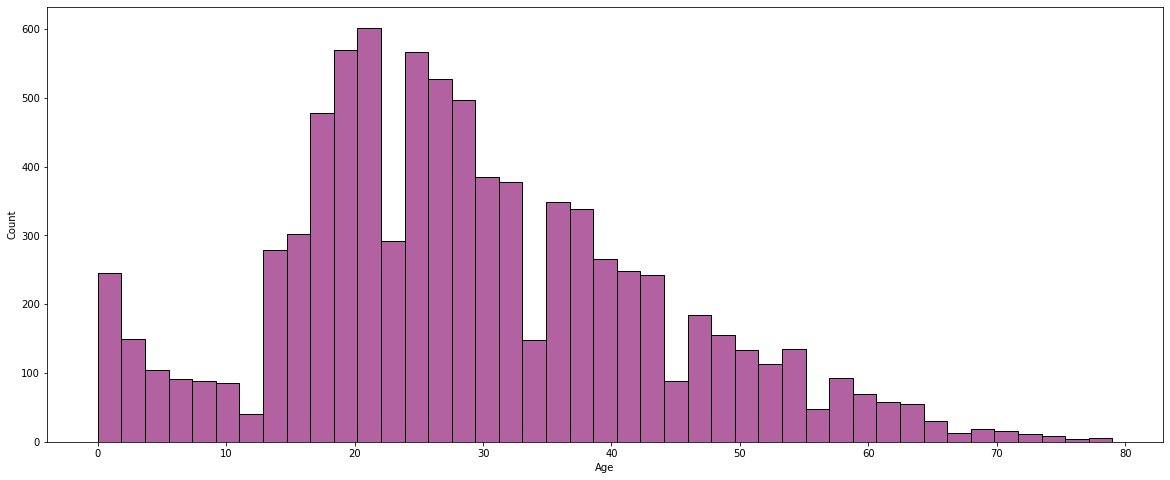

In [15]:
plt.figure(figsize=(20,8))
sns.histplot(dataTrain.Age, color=sns.color_palette('magma')[2])
plt.show()

In [16]:
trainAge = dataTrain.copy()
testAge = dataTest.copy()
trainAge["type"] = "Train"
testAge["type"] = "Test"
ageDf = pd.concat([trainAge, testAge])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#FFA500','#87CEEB'],
                   marginal="box",
                   nbins= 100,
                   template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

RangeIndex(start=0, stop=8693, step=1)

In [26]:
idCol = dataTest.PassengerId.to_numpy()
dataTrain.set_index('PassengerId', inplace=True)
dataTest.set_index('PassengerId', inplace=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataTrain = pd.DataFrame(imputer.fit_transform(dataTrain), columns=dataTrain.columns, index=dataTrain.index)
dataTest = pd.DataFrame(imputer.fit_transform(dataTest), columns=dataTest.columns, index=dataTest.index)
dataTrain = dataTrain.reset_index(drop=True)
dataTest = dataTest.reset_index(drop=True)

In [22]:
dataTrain.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [27]:
dataTrain.Transported = dataTrain.Transported.astype('int')
dataTrain.VIP = dataTrain.VIP.astype('int')
dataTrain.CryoSleep = dataTrain.CryoSleep.astype('int')
dataTrain.drop(columns=['Cabin', 'Name'], inplace=True)
dataTest.drop(columns=['Cabin', 'Name'], inplace=True)
dataTrain.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [28]:
dataTrain = pd.get_dummies(dataTrain, columns=['HomePlanet', 'CryoSleep', 'Destination'])
dataTest = pd.get_dummies(dataTest, columns=['HomePlanet', 'CryoSleep', 'Destination'])
dataTrain.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1
1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,0,0,0,1
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,0,0,1
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,0,0,1
4,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0,0,1


In [29]:
yTrain = dataTrain.pop('Transported').to_numpy()
xTrain = dataTrain.to_numpy()
xTest = dataTest.to_numpy()
xTrain.shape, yTrain.shape, xTest.shape

((8693, 15), (8693,), (4277, 15))

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(3)
knnClassifier.fit(xTrain, yTrain)
knnClassifier.score(xTrain, yTrain)

0.8297480731623145

In [31]:
from sklearn.svm import SVC

svClassifier = SVC()
svClassifier.fit(xTrain, yTrain)
svClassifier.score(xTrain, yTrain)

0.7898308984240193

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier()
rfClassifier.fit(xTrain, yTrain)
rfClassifier.score(xTrain, yTrain)

0.9292534222937996

In [33]:
from sklearn.naive_bayes import GaussianNB

nbClassifier = GaussianNB()
nbClassifier.fit(xTrain, yTrain)
nbClassifier.score(xTrain, yTrain)

0.7465777062003911

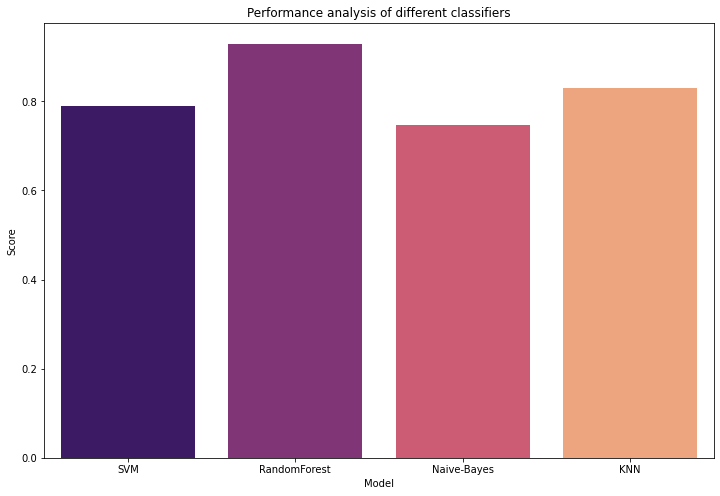

In [34]:
dataPerf = pd.DataFrame(data={'Model': ['SVM', 'RandomForest', 'Naive-Bayes','KNN'], 'Score': [svClassifier.score(xTrain, yTrain), rfClassifier.score(xTrain, yTrain), nbClassifier.score(xTrain, yTrain), knnClassifier.score(xTrain, yTrain)]})

plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data=dataPerf, palette="magma")
plt.title('Performance analysis of different classifiers')
plt.show()

In [35]:
submission = pd.DataFrame(columns=["PassengerId","Transported"])
submission["PassengerId"] = idCol
submission.set_index('PassengerId')
submission["Transported"] = rfClassifier.predict(xTest).astype(bool)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [36]:
submission.to_csv('submission.csv', index=False)
print('Submission succesful!')

Submission succesful!
